<font size=5><b>샘플링

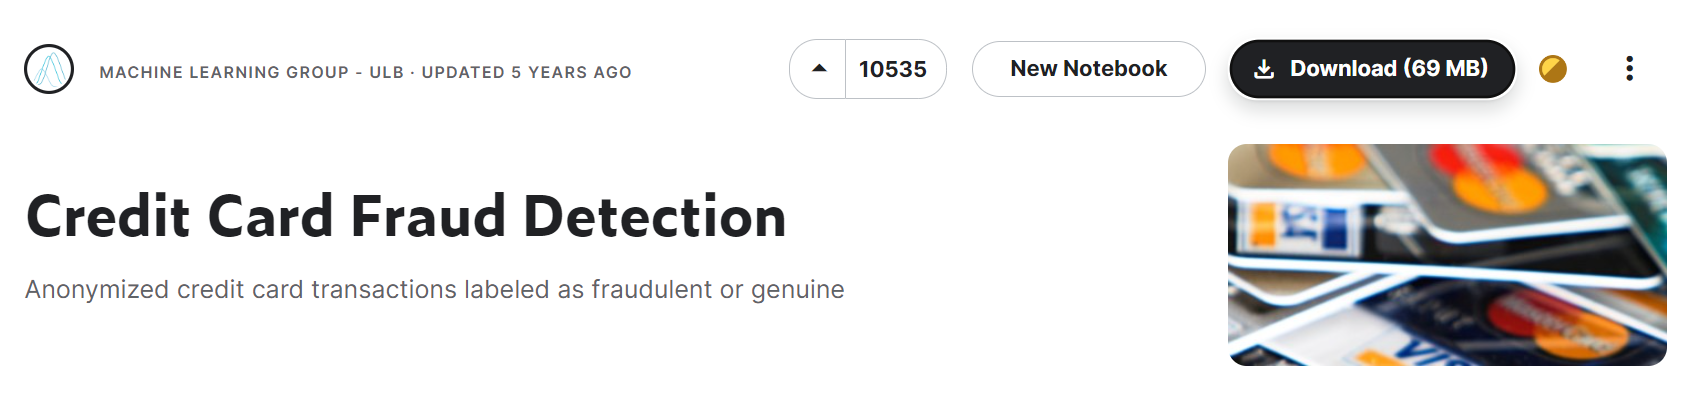
* ref : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------ 훈련데이터
from sklearn.datasets import load_iris
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# -------------------------------------------------------------------------- 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# -------------------------------------------------------------------------- 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# -------------------------------------------------------------------------- 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# -------------------------------------------------------------------------- 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
# -------------------------------------------------------------------------- 교차검증
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------------------------------

import warnings
warnings.filterwarnings(action="ignore")

#----------------------------------- 차트 : seaborn 스타일 적용
sns.set()

In [2]:
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 차트 관련 속성 (차트크기 ) -----------
# plt.rcParams['figure.figsize'] = (4, 2)
# plt.rcParams['font.size'] = 7

# Data Load
* df.info()
* df.shape
* df.head()

In [3]:
df = pd.read_csv("./creditcard.csv")
# df.columns = df.columns.str.lower()
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

# 샘플링

```python
DataFrame.sample(n=None, frac=None, weights=None, random_state=None, axis=None, ignore_index=False)

[주의] replace=True 속성 : 동작안함
```

In [6]:
df1 = df[df['Class']==1]
print(df1.shape)
df0 = df[df['Class']==0]
print(df0.shape)

(492, 31)
(284315, 31)


In [7]:
df0 = df0.sample(n=492*99, random_state=1212, ignore_index=True)
print(df0.shape)

(48708, 31)


In [8]:
df = pd.concat([df0, df1], axis=0)
df.shape

(49200, 31)

0    48708
1      492
Name: Class, dtype: int64


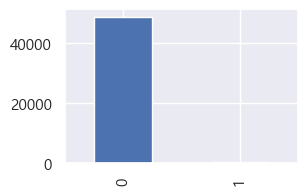

In [9]:
plt.figure(figsize=(3,2))
print( df['Class'].value_counts() )
df['Class'].value_counts().plot(kind='bar')
plt.show()      

# EDA
* 이전 파일 참조

# 전치리 & 가공

## 원본 카피
* 복원 시 사용 계획

In [10]:
orig_df = df.copy()

## 중복제거
* 773 rows (0.3%)

```python
DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)
```

In [11]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
print(49200 - 49140 ,   (60/49140) * 100)

(49200, 31)
(49140, 31)
60 0.1221001221001221


## 1차 점수

In [12]:
# help(train_test_split)
# help(DecisionTreeClassifier)
# help(cross_val_score)
# help(StratifiedKFold)

In [13]:
#----------------------------------- 원본점수
df = orig_df.copy()

y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1212, stratify=y)
model = DecisionTreeClassifier(random_state=1212)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)
# accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, proba[:,1])

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1212)
score_arr = cross_val_score(model, X, y, scoring="f1", cv=skfold, n_jobs=-1)

print(f"f1:{f1:.4f} f1(cv):{score_arr.mean():.4f}")
print(confusion_matrix(y_test, pred) )


f1:0.8400 f1(cv):0.7955
[[9724   18]
 [  14   84]]


# 공통함수

In [48]:
def my_score(model, df) : 
    y = df['Class']
    X = df.drop('Class', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1212, stratify=y)
    model = DecisionTreeClassifier(random_state=1212)
    model.fit(X_train, y_train)
    pred  = model.predict(X_test)
    proba = model.predict_proba(X_test)
    # accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, proba[:,1])
    
    skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1212)
    score_arr = cross_val_score(model, X, y, scoring="f1", cv=skfold, n_jobs=-1)

    print(f"f1:{f1:.4f} f1(cv):{score_arr.mean():.4f}")
    print(confusion_matrix(y_test, pred) )

## 아웃라이어

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

y = df['Class']
X = df.drop('Class', axis=1)

Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))


classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=1212, verbose=0),
    # "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
    #                                           leaf_size=30, metric='minkowski',
    #                                           p=2, metric_params=None, contamination=outlier_fraction),
    # 메모리 릭... 열지마시오
    # "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
    #                                      max_iter=-1)
   
}

# #Fit the model
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1]  = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    print(f"{clf_name}: {n_errors}")
    
    # Run Classification Metrics
    print(f"Accuracy Score : {accuracy_score(y,y_pred):.4f}")
    print("Classification Report")
    print(classification_report(y,y_pred))
    print("---"*20) 

Isolation Forest: 473
Accuracy Score : 0.9904
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48708
           1       0.52      0.52      0.52       492

    accuracy                           0.99     49200
   macro avg       0.76      0.76      0.76     49200
weighted avg       0.99      0.99      0.99     49200

------------------------------------------------------------


<pre>
Isolation Forest: 473
Accuracy Score : 0.9904
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48708
           1       0.52      0.52      0.52       492

    accuracy                           0.99     49200
   macro avg       0.76      0.76      0.76     49200
weighted avg       0.99      0.99      0.99     49200

------------------------------------------------------------
Local Outlier Factor: 955
Accuracy Score : 0.9806
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     48708
           1       0.03      0.03      0.03       492

    accuracy                           0.98     49200
   macro avg       0.51      0.51      0.51     49200
weighted avg       0.98      0.98      0.98     49200

------------------------------------------------------------

## 스케일링
* 연속형 변수 : Amount, Time
* 로그변환 : np.log1p()
* 스케일링 : sklearn.preprocessing : MinMaxScaler(), StandardScaler(), RobustScaler()
* 왜도 첨도

* 음수의 로그변환은? 
    * 양수로 만들 수 있는 임의의 수치를 모든 데이터에 더해준다

In [31]:
num1  = -2.7
num2 = -1.7

print(num1 + np.abs(num1)+1)
print(num2 + np.abs(num1)+1 )

print( np.log1p(num1 + np.abs(num1)+1) )
print( np.log1p(num2 + np.abs(num1)+1 ) )


1.0
2.0
0.6931471805599453
1.0986122886681098


In [38]:
from scipy.stats import skew, kurtosis
# 왜도
sk = skew(df)
# 첨도
ku =kurtosis(df)
temp = pd.DataFrame()
temp['col'] = df.columns
temp['sk'] = sk
temp['ku'] = ku
temp.head(3)

,col,sk,ku
0,Time,-0.028968,-1.295685
1,V1,-3.836626,36.450123
2,V2,-2.995053,61.594929


* 왜도

In [40]:
temp.sort_values(by='sk', ascending=False)

,col,sk,ku
29,Amount,26.282053,1814.013495
30,Class,9.849371,95.010101
27,V27,6.140755,627.209792
7,V7,5.581666,833.758352
21,V21,4.565350,290.952496
28,V28,4.467238,563.045655
6,V6,4.379458,174.161410
11,V11,1.099055,6.633628
4,V4,1.024135,4.386104
26,V26,0.609410,1.104256


* 첨도

In [41]:
temp.sort_values(by='ku', ascending=False)

,col,sk,ku
29,Amount,26.282053,1814.013495
7,V7,5.581666,833.758352
5,V5,-10.075241,634.253247
27,V27,6.140755,627.209792
28,V28,4.467238,563.045655
20,V20,-7.447800,531.448442
21,V21,4.565350,290.952496
8,V8,-8.597009,217.050589
23,V23,-3.030302,193.491796
6,V6,4.379458,174.161410


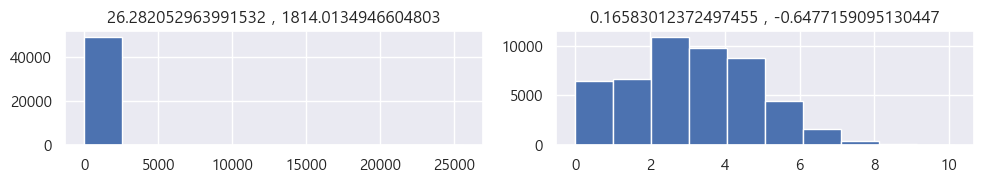

In [45]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
df['Amount'].hist()
plt.title(f"{skew(df['Amount'])} , {kurtosis(df['Amount'])}")

plt.subplot(1,2,2)
np.log1p(df['Amount']).hist()
plt.title(f"{skew(np.log1p(df['Amount']))} , {kurtosis(np.log1p(df['Amount']))}")

plt.tight_layout()
plt.show()

In [46]:
df['Amount'] = np.log1p(df['Amount'])

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
my_score(lr, df)

f1:0.8400 f1(cv):0.7955
[[9724   18]
 [  14   84]]


In [64]:
scaler_list = (MinMaxScaler(), StandardScaler(), RobustScaler())
for scaler in scaler_list:
    # df : 아웃라이어 제거,  로그변환(Amount)
    y = df['Class']
    X = df.drop('Class', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1212, stratify=y)

    scaler.fit(X_train['Amount'].values.reshape(-1,1))
    train_amount_scaler = scaler.transform(X_train['Amount'].values.reshape(-1,1))
    test_amount_scaler = scaler.transform(X_test['Amount'].values.reshape(-1,1))

    X_train['Amount'] = train_amount_scaler
    X_test['Amount']  = test_amount_scaler

    #----------------------------------------------------------  
    # my_score(df) 카피
    #---------------------------------------------------------- 
    model = LogisticRegression(random_state=1212)
    model.fit(X_train, y_train)
    pred  = model.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1212)
    score_arr = cross_val_score(model, X, y, scoring="f1", cv=skfold, n_jobs=-1)

    print(scaler.__class__.__name__)
    print(f"{accuracy:.4f} f1:{f1:.4f} f1(cv):{score_arr.mean():.4f}")
    print(confusion_matrix(y_test, pred) )
    print("--"*30)


MinMaxScaler
0.9977 f1:0.8743 f1(cv):0.8495
[[9737    5]
 [  18   80]]
------------------------------------------------------------
StandardScaler
0.9960 f1:0.8060 f1(cv):0.8495
[[9720   22]
 [  17   81]]
------------------------------------------------------------
RobustScaler
0.9972 f1:0.8557 f1(cv):0.8495
[[9729   13]
 [  15   83]]
------------------------------------------------------------


<pre>
원본 (DecisionTree)
f1:0.8400 f1(cv):0.7955
[[9724   18]
 [  14   84]]


